# Market Shock and Sector Resilience: Analyzing the COVID-19 Crash of 2020

This notebook explores the dramatic impact of the 2020 COVID-19 market crash on key U.S. equity sectors. 

We analyze the S&P 500's crash and recovery using historical price data, compute sector-specific returns, and visualize performance trends across Technology, Financials, Energy, and Healthcare. 

The goal is to understand how different sectors responded to crisis conditions — from sharp declines to varied paths of recovery — through data storytelling, charts, and key metrics.

In [ ]:
%pip install -r requirements.txt

## Import Libraries and Set Global Styling

In [147]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

In [148]:
plt.style.use("dark_background")

plt.rcParams.update({
    'figure.facecolor': '#071e22',   # Whole figure
    'axes.facecolor':   '#071e22',   # Axes (plot area)
    'axes.edgecolor':   'white',
    'axes.labelcolor':  'white',
    'xtick.color':      'white',
    'ytick.color':      'white',
    'text.color':       'white',
    'legend.facecolor': '#071e22',
    'legend.edgecolor': 'white',
    'grid.color':       'gray'
})

figsize = (19.2, 10.8)
grid_style = {
    'visible': True,
    'color': 'gray',
    'linestyle': '--',
    'linewidth': 0.5
}


## The Crash

### Download S&P 500 Data

In [149]:
df = yf.download('^GSPC', start='2019-01-01', end='2020-12-31')
df.columns = df.columns.get_level_values(0)

C:\Users\Brian\AppData\Local\Temp\ipykernel_16632\2625932806.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('^GSPC', start='2019-01-01', end='2020-12-31')
[*********************100%***********************]  1 of 1 completed


### Peak and Bottom

In [150]:
# Filter between 2020-01-01 and 2020-06-30
mask = (df.index >= '2020-01-01') & (df.index <= '2020-06-30')
filtered = df.loc[mask]

# Find peak and bottom within filtered range
peak_date = filtered['Close'].idxmax()
peak_value = filtered['Close'].max()

bottom_date = filtered['Close'].idxmin()
bottom_value = filtered['Close'].min()

print(f"Peak Date: {peak_date.strftime('%Y-%m-%d')}, Close: ${peak_value:.2f}")
print(f"Bottom Date: {bottom_date.strftime('%Y-%m-%d')}, Close: ${bottom_value:.2f}")


Peak Date: 2020-02-19, Close: $3386.15
Bottom Date: 2020-03-23, Close: $2237.40


### Crash Rate

In [151]:
# Calculate the difference between peak and bottom dates
delta = bottom_date - peak_date

# Days
days = delta.days

# Weeks (approximate, including fractional weeks)
weeks = days / 7

# Months (approximate, using average month length 30.44 days)
months = days / 30.44

print(f"Time from peak to low:")
print(f"- Days: {days} days")
print(f"- Weeks: {weeks:.2f} weeks")
print(f"- Months: {months:.2f} months")

Time from peak to low:
- Days: 33 days
- Weeks: 4.71 weeks
- Months: 1.08 months


### Visualize Crash Period

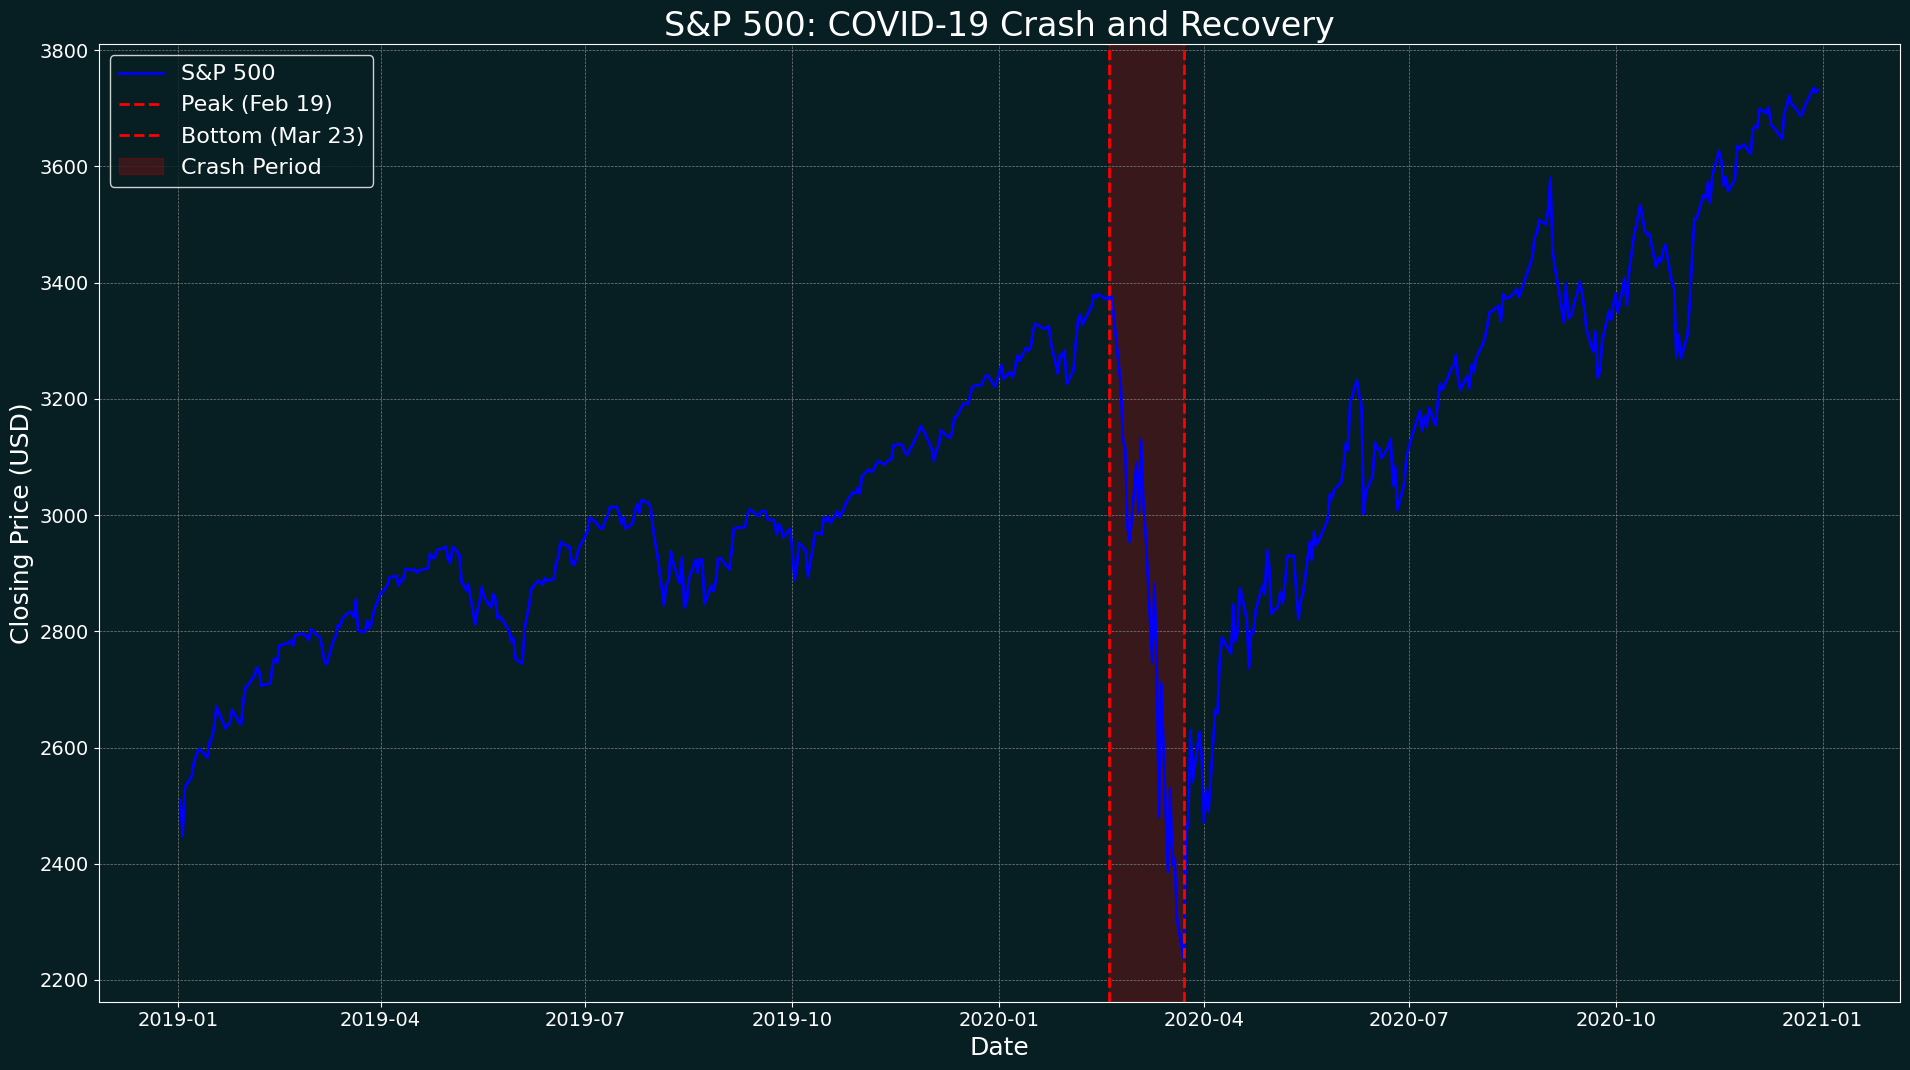

In [152]:
plt.figure(figsize=figsize, dpi=100)
plt.plot(df.index, df['Close'], label='S&P 500', color='blue', linewidth=2)

plt.axvline(peak_date, linestyle='--', color='red', label=f'Peak ({peak_date.strftime("%b %d")})', linewidth=2)
plt.axvline(bottom_date, linestyle='--', color='red', label=f'Bottom ({bottom_date.strftime("%b %d")})', linewidth=2)

plt.axvspan(peak_date, bottom_date, color='red', alpha=0.2, label='Crash Period')

plt.title('S&P 500: COVID-19 Crash and Recovery')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(**grid_style)
plt.tight_layout()
plt.savefig('sp500_crash_recovery.png')
plt.show()


### The Percentage Drop Between Peak and Bottom

In [153]:
peak = df.loc[peak_date]['Close']
bottom = df.loc[bottom_date]['Close']
drop_pct = round((bottom - peak) / peak * 100, 2)
drop_pct

np.float64(-33.92)

## The VIX Index

### Download VIX Data

In [154]:
vix = yf.download('^VIX', start='2019-01-01', end='2020-12-31')

C:\Users\Brian\AppData\Local\Temp\ipykernel_16632\1961913761.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^VIX', start='2019-01-01', end='2020-12-31')
[*********************100%***********************]  1 of 1 completed


### Visualize Volume and Volatility

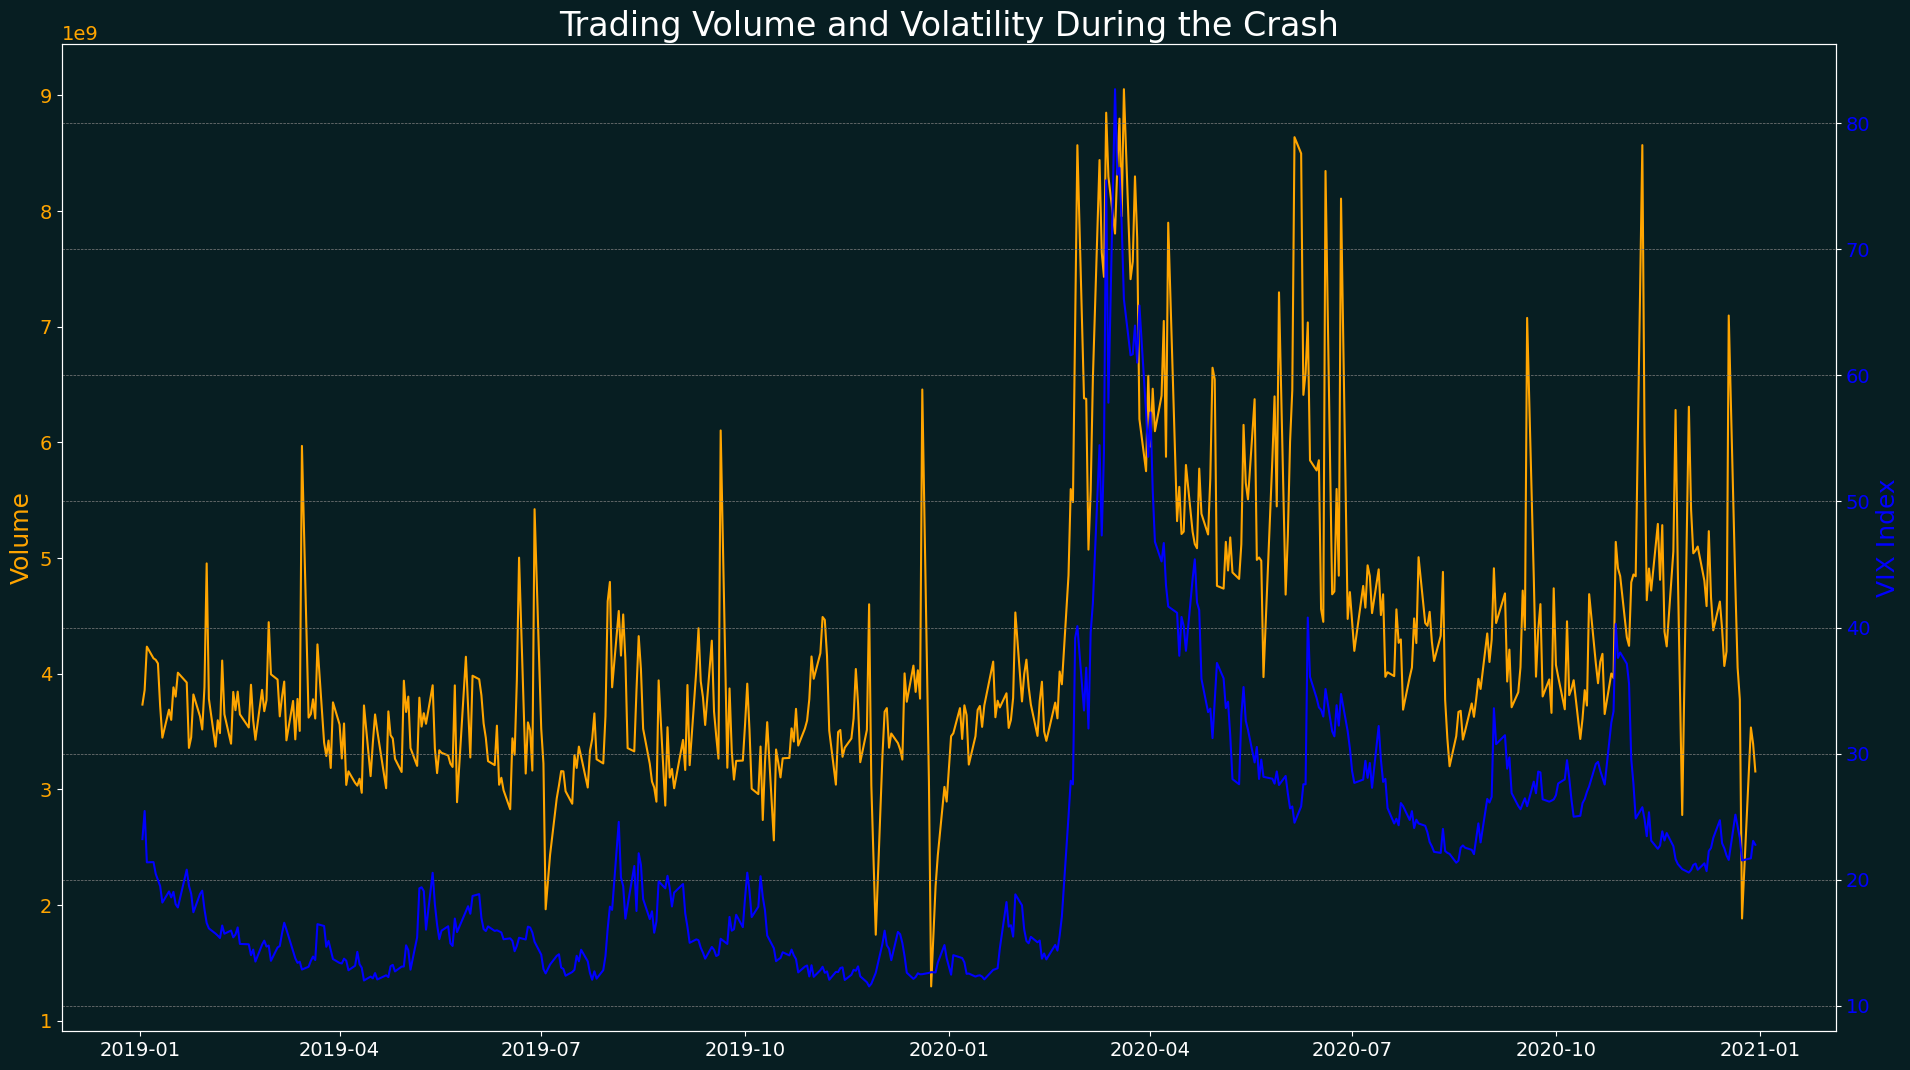

In [155]:
fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(df.index, df['Volume'], color='orange', label='S&P 500 Volume')
ax1.set_ylabel('Volume', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax2 = ax1.twinx()
ax2.plot(vix.index, vix['Close'], color='blue', label='VIX (Volatility Index)')
ax2.set_ylabel('VIX Index', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Trading Volume and Volatility During the Crash')
fig.tight_layout()
plt.grid(**grid_style)
plt.savefig("volume_vix_panic.png")
plt.show()

### Peak VIX

In [156]:
vix_peak_date = vix['Close'].idxmax()
vix_peak = vix['Close'].max()

# If these are Series, get the first scalar value
if isinstance(vix_peak_date, pd.Series):
    vix_peak_date = vix_peak_date.iloc[0]
if isinstance(vix_peak, pd.Series):
    vix_peak = vix_peak.iloc[0]

print(f"VIX Peak Date: {vix_peak_date.strftime('%Y-%m-%d')}")
print(f"VIX Peak Value: {vix_peak:.2f}")


VIX Peak Date: 2020-03-16
VIX Peak Value: 82.69


## Industries

### Download Sector-specific Exchange-Taded Funds (ETFs)

In [157]:
tickers = ['XLK', 'XLF', 'XLE', 'XLV']
data = yf.download(tickers, start=bottom_date, end='2020-12-31')['Close']
normalized = data / data.iloc[0] * 100

C:\Users\Brian\AppData\Local\Temp\ipykernel_16632\3503396811.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=bottom_date, end='2020-12-31')['Close']
[*********************100%***********************]  4 of 4 completed


In [158]:
sector_labels = {
    'XLK': 'Technology (XLK)',
    'XLF': 'Financials (XLF)',
    'XLE': 'Energy (XLE)',
    'XLV': 'Healthcare (XLV)'
}

sector_colors = {
    'XLK': '#1f77b4',  # Blue (Technology)
    'XLF': '#ff7f0e',  # Orange (Financials)
    'XLE': '#2ca02c',  # Green (Energy)
    'XLV': '#d62728'   # Red (Healthcare)
}

### Sector Perfomance After the Crash

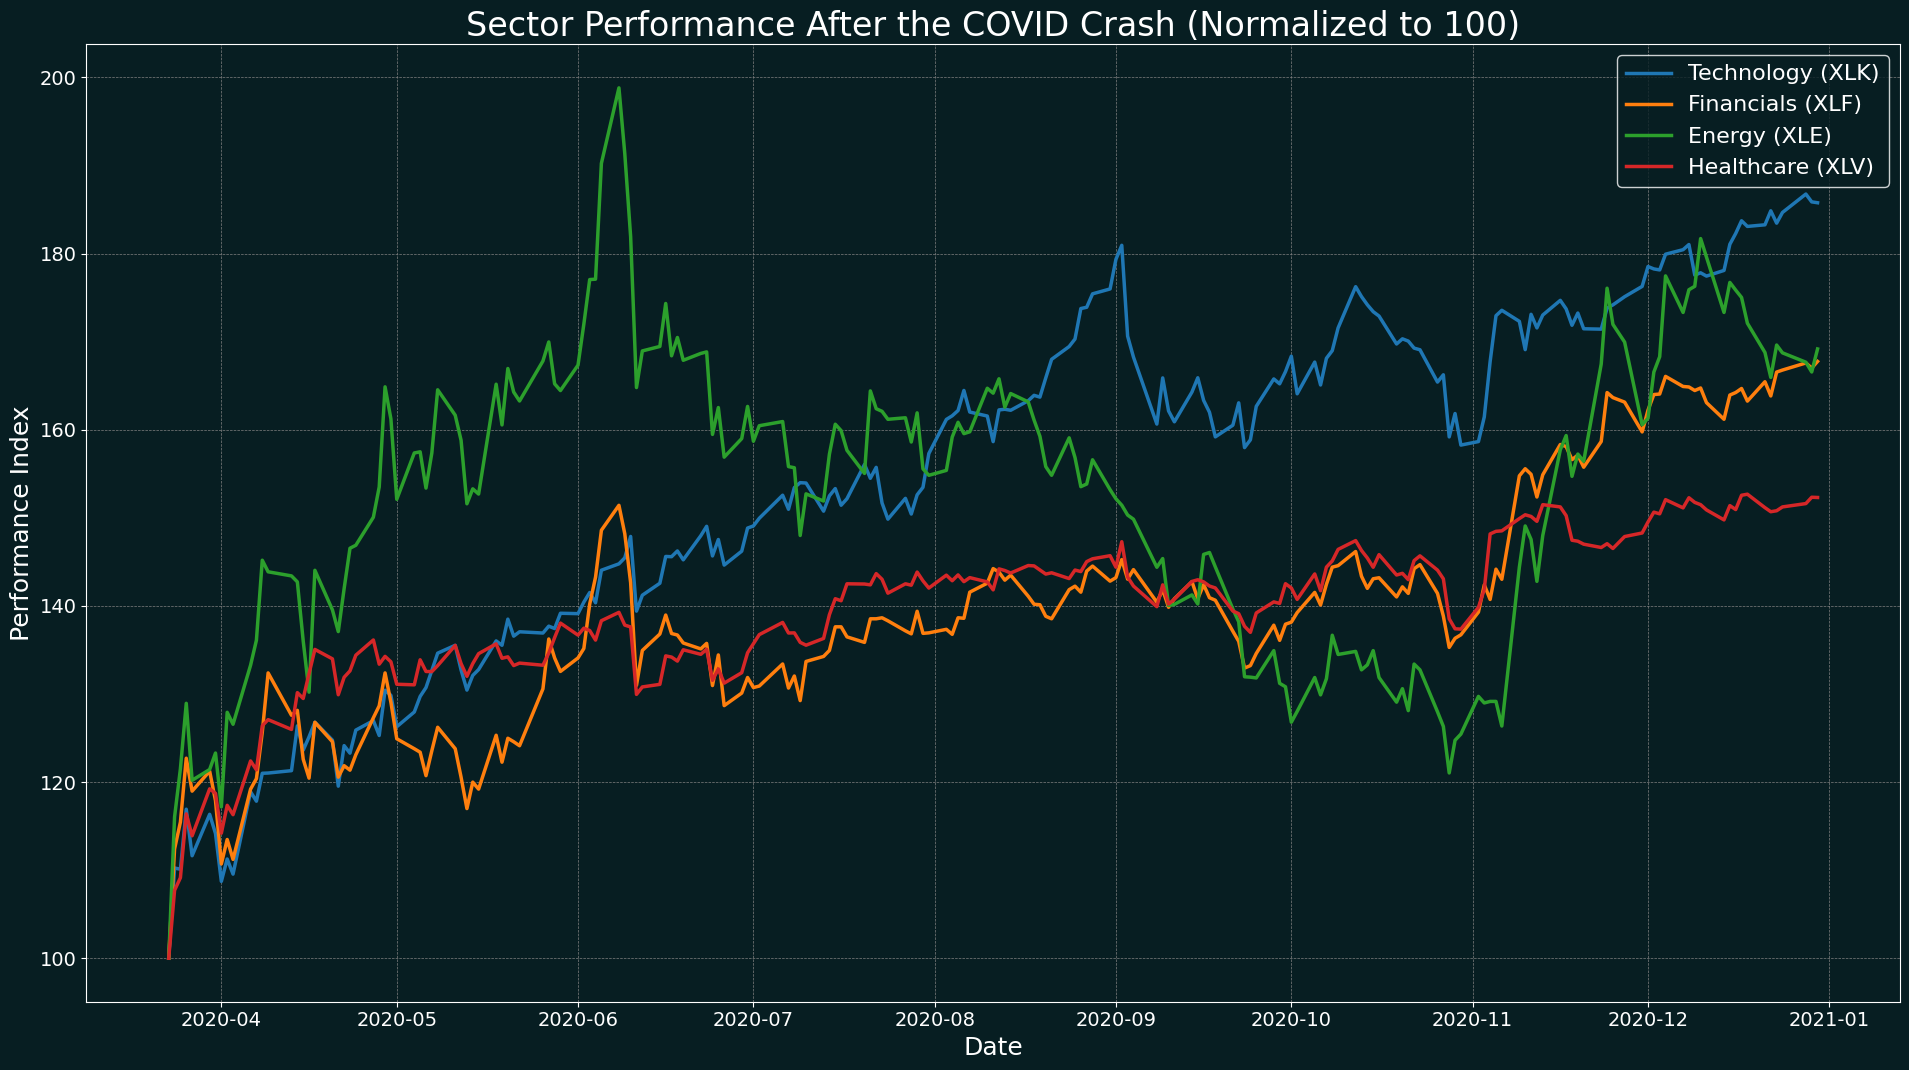

In [159]:
plt.figure(figsize=figsize)
for ticker in tickers:
    plt.plot(
        normalized[ticker],
        label=sector_labels[ticker],
        color=sector_colors[ticker],  # use consistent color
        linewidth=2.5
    )

plt.title('Sector Performance After the COVID Crash (Normalized to 100)')
plt.xlabel('Date')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(**grid_style)
plt.tight_layout()
plt.savefig("sector_performance_normalized.png")
plt.show()


### Sector Returns After the Crash

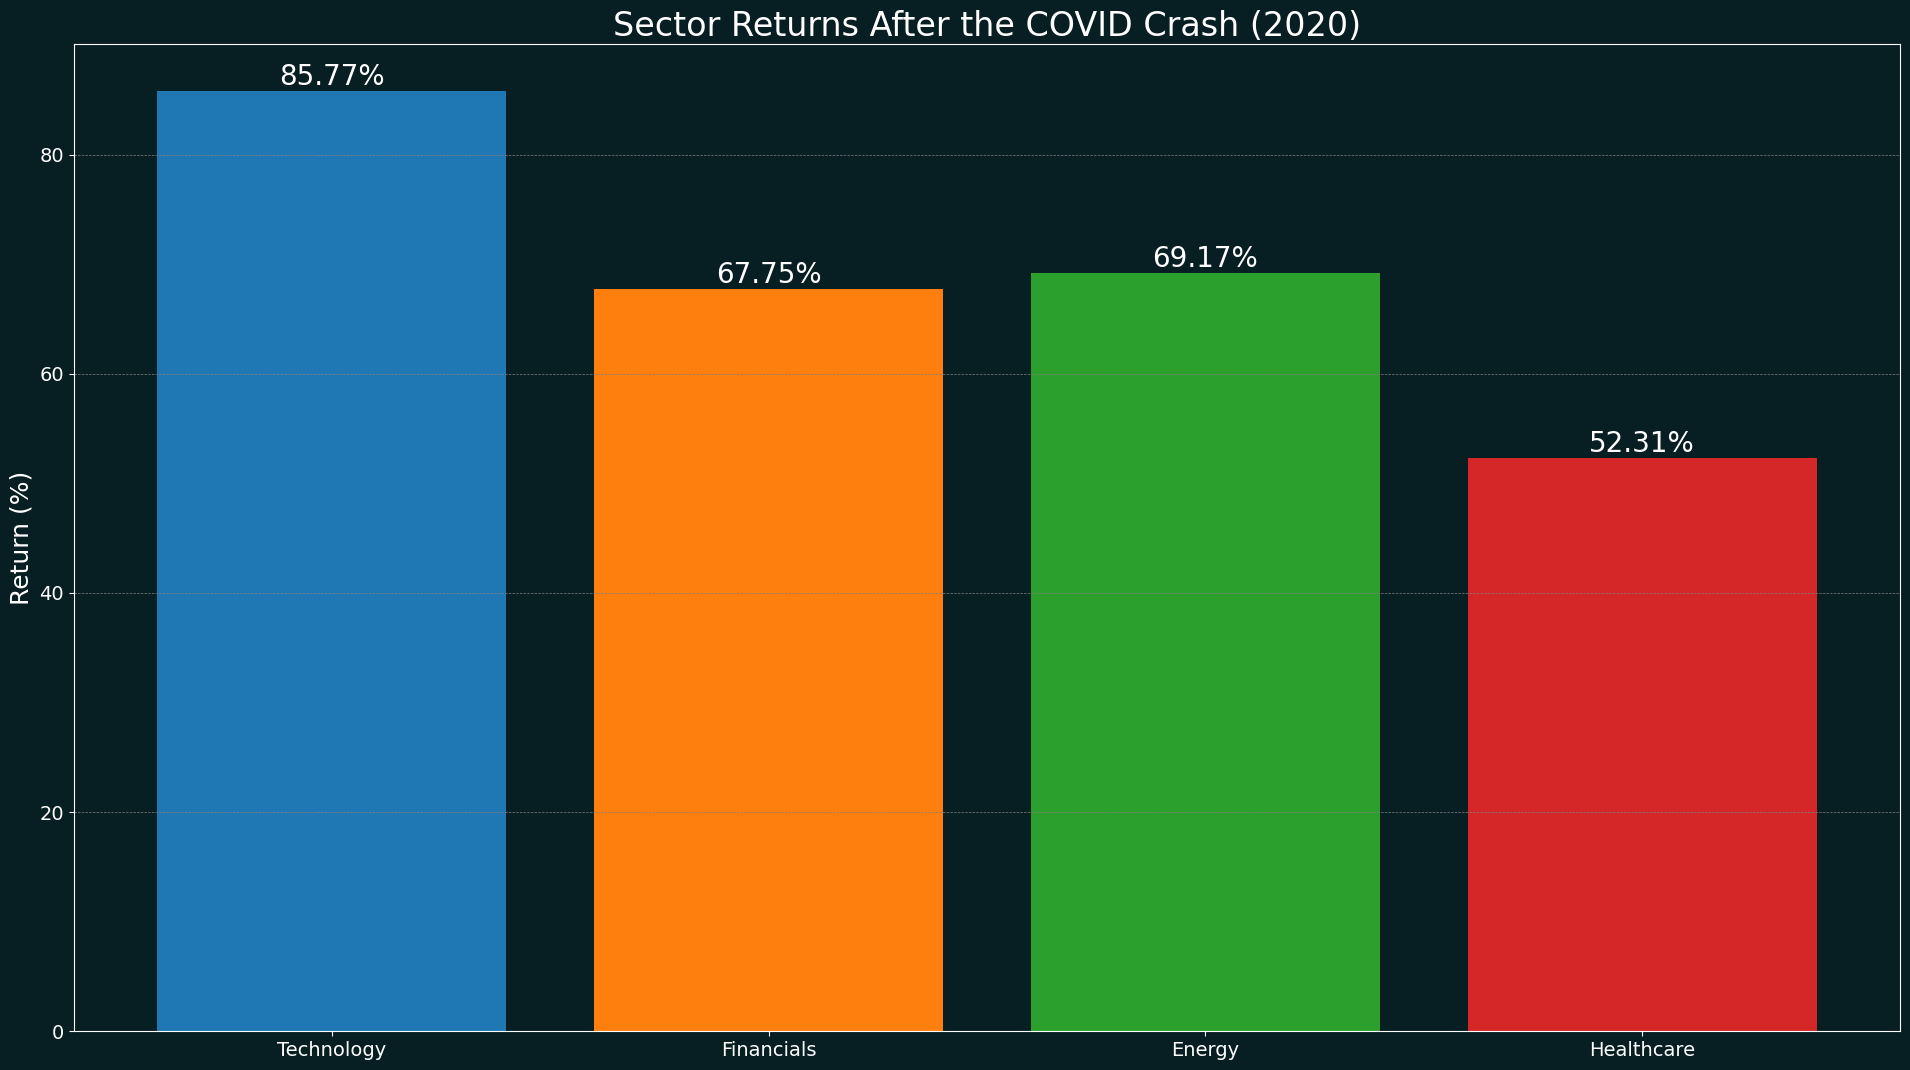

In [160]:
# Calculate returns
returns = (data.iloc[-1] / data.iloc[0] - 1) * 100
returns = returns.round(2)

# Map sectors
sector_labels = {
    'XLK': 'Technology',
    'XLF': 'Financials',
    'XLE': 'Energy',
    'XLV': 'Healthcare'
}

# Create labeled Series for plotting
sector_returns = pd.Series({sector_labels[ticker]: returns[ticker] for ticker in tickers})

# Plot
plt.figure(figsize=figsize)
bars = plt.bar(sector_returns.index, sector_returns.values, color=sector_colors.values())

# Annotate bars with return values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=20)

plt.title('Sector Returns After the COVID Crash (2020)')
plt.ylabel('Return (%)')
plt.grid(axis='y', **grid_style)
plt.tight_layout()
plt.savefig('sector_returns_barplot.png')
plt.show()
